# Econophysics I
## Exercise 04 - H09

### Juan Camilo Henao Londono
### Universität Duisburg-Essen
12.05.2020

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt

## Exercise 04. Homework 09. Point 01

The random variables $x_{1}$, $x_{2}$ and $x_{3}$ are equally distributed between $0$ and $1$ and are independent. Compute the distribution of $u^{\left( 2 \right)} = x_{1} + x_{2}$ and $u^{\left( 3 \right)} = x_{1} + x_{2} + x_{3}$. Draw the distributions of $x_{1}$, $u^{\left( 2 \right)}$ and $u^{\left( 3 \right)}$ and discuss them with respect to the central limit theorem. For this, compare each with a Gaussian distribution with suitably chosen mean and standard deviation parameters, which can be calculated from the mean and standard deviation of the distribution of $x_{1}$.

In [2]:
def gaussian_distribution(mean, variance, x):
    return (1 / (2 * np.pi * variance) ** 0.5) * np.exp(-((x - mean) ** 2) / (2 * variance))

In [3]:
def random_distribution_1_value(x):
    
    y = np.copy(x)
    
    # The values between 0 <= x <= 1 will take the value 1
    condition_1 = (y >= 0) * (y <= 1)
    y[condition_1] = 1
    # The values outside 0 <= x <= 1 will take the value 0
    y[~condition_1] = 0
            
    return y

In [4]:
def random_distribution_2_values(x):
    
    y = np.copy(x)
    
    # The values between 0 <= x <= 1 grows like a straight line
    # The values between 1 < x <= 2 decrease like a straight line
    condition_2 = (y > 1) * (y <= 2)
    y[condition_2] = 2 - y[condition_2] 
    # The values outside 0 <= x <= 2 will take the value 0
    condition_0 = (y < 0) + (y > 2)
    y[condition_0] = 0
        
    return y

In [5]:
def random_distribution_3_values(x):
    
    y = np.copy(x)
        
    condition_1 = (y >= 0) * (y <= 1)
    y[condition_1] = 0.5 * y[condition_1] * y[condition_1]
    
    condition_2 = (y > 1) * (y <= 2)
    y[condition_2] = 0.5 * (- 2 * y[condition_2] * y[condition_2] + 6 * y[condition_2] - 3)
    
    condition_3 = (y > 2) * (y <= 3)
    y[condition_3] = 0.5 * (y[condition_3] * y[condition_3]- 6 * y[condition_3] + 9 )  
    
    condition_0 = (y < 0) + (y > 3)
    y[condition_0] = 0
        
    return y

In [6]:
# Initial values

mu = 0.5
sigma = 1/12

x1 = np.arange(-1, 2, 0.001)
y1 = random_distribution_1_value(x1)
g1 = gaussian_distribution(mu, sigma, x1)

x2 = np.linspace(-1, 3, 1000) 
y2 = random_distribution_2_values(x2)
g2 = gaussian_distribution(2*mu, 2*sigma, x2)

x3 = np.linspace(-1, 4, 1000) 
y3 = random_distribution_3_values(x3)
g3 = gaussian_distribution(3*mu, 3*sigma, x3)

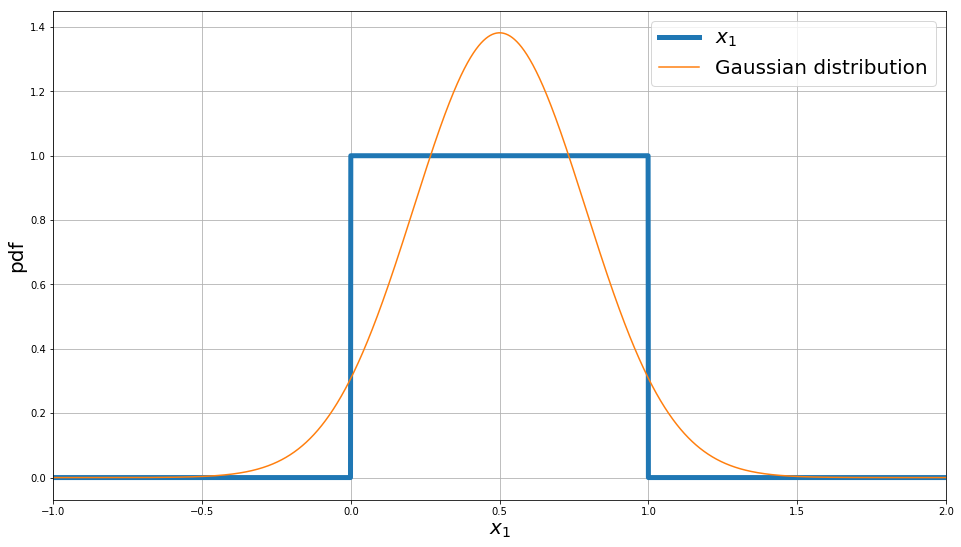

In [7]:
# One uniform distribution

# Figure
fig = plt.figure(figsize=(16,9))

plt.plot(x1, y1, linewidth=5, label=r"$x_1$")
plt.plot(x1, g1, label=r"Gaussian distribution")
plt.ylabel('pdf', fontsize=20)
plt.xlabel('$x_1$', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(-1,2)
plt.grid(True)

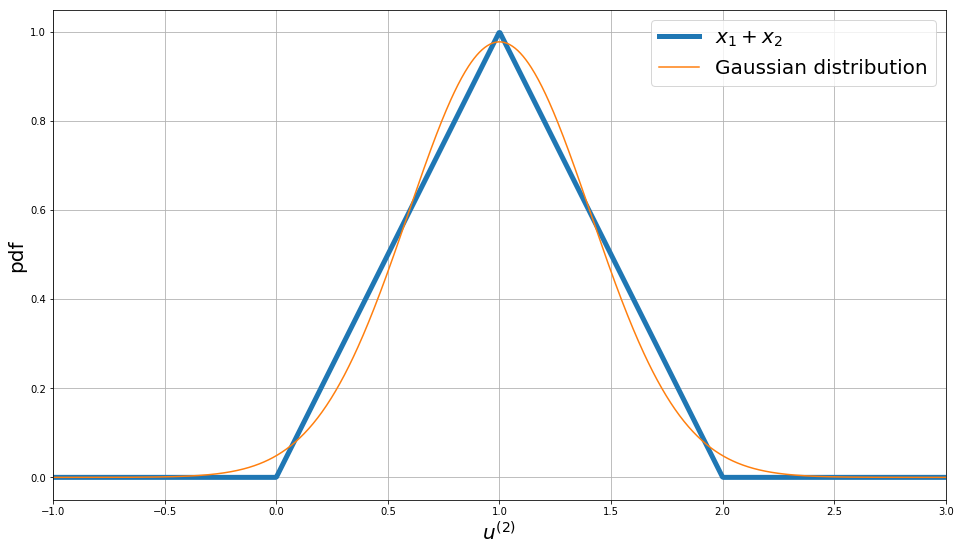

In [8]:
# Two uniform distribution

# Figure
fig = plt.figure(figsize=(16,9))

plt.plot(x2, y2, linewidth=5, label=r"$x_1 + x_2$")
plt.plot(x2, g2, label=r"Gaussian distribution")
plt.ylabel('pdf', fontsize=20)
plt.xlabel('$u^{(2)}$', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(-1,3)
plt.grid(True)

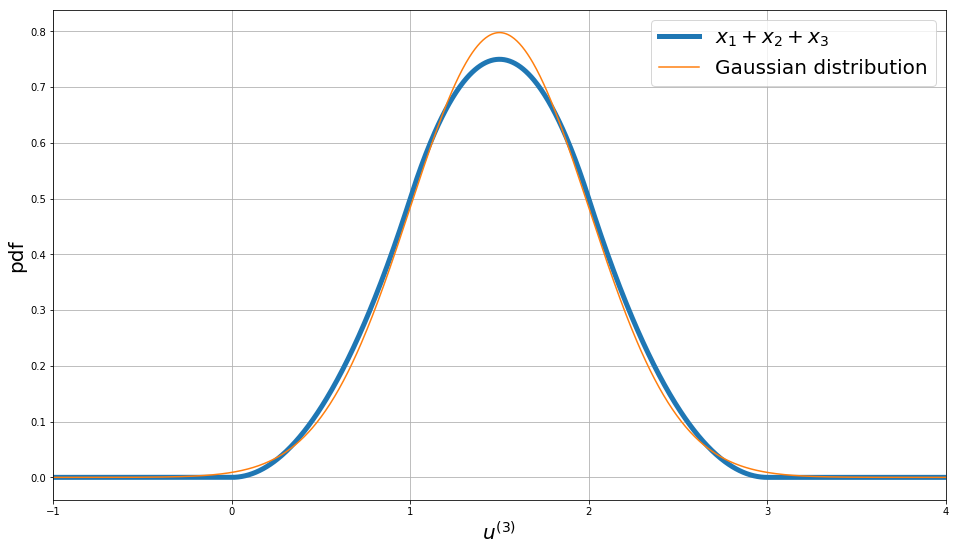

In [9]:
# Three uniform distribution

# Figure
fig = plt.figure(figsize=(16,9))

plt.plot(x3, y3, linewidth=5, label=r"$x_1 + x_2 + x_3$")
plt.plot(x3, g3, label=r"Gaussian distribution")
plt.ylabel('pdf', fontsize=20)
plt.xlabel('$u^{(3)}$', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.xlim(-1,4)
plt.grid(True)